# Netflix stocks prediction with **time series**

Time-series data contain values that are typically generated by continuous measurement over time.

## Dependencies

In [ ]:
import scipy as sp # for signal processing
from scipy import signal
from scipy.spatial import distance
import numpy as np
import pandas as pd
from pandas import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
import seaborn as sns # Grafication
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('bmh')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


## Load data

In [ ]:
df = pd.read_csv('NFLX.csv')
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,13/08/2021,512.640015,521.440002,511.510010,515.919983,515.919983,2177700
1,16/08/2021,515.239990,523.380005,512.299988,517.919983,517.919983,2032800
2,17/08/2021,515.469971,520.789978,514.200012,518.909973,518.909973,2309800
3,18/08/2021,520.000000,526.380005,518.650024,521.869995,521.869995,2582000
4,19/08/2021,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
5,20/08/2021,545.090027,551.390015,539.099976,546.880005,546.880005,3776400
6,23/08/2021,545.979980,555.549988,543.739990,553.330017,553.330017,2602000
7,24/08/2021,551.479980,555.309998,549.270020,553.409973,553.409973,2109500
8,25/08/2021,550.159973,552.840027,545.450012,547.580017,547.580017,2065600
9,26/08/2021,546.159973,552.599976,545.900024,550.119995,550.119995,1595500


## Matrix of correlation

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999485,0.999432,0.998700,0.998700,-0.375935
High,0.999485,1.000000,0.999437,0.999429,0.999429,-0.372031
Low,0.999432,0.999437,1.000000,0.999443,0.999443,-0.386213
Close,0.998700,0.999429,0.999443,1.000000,1.000000,-0.377657
Adj Close,0.998700,0.999429,0.999443,1.000000,1.000000,-0.377657
Volume,-0.375935,-0.372031,-0.386213,-0.377657,-0.377657,1.000000


## Matrix of covariance

In [ ]:
df.cov() # 

,Open,High,Low,Close,Adj Close,Volume
Open,3.324327e+04,3.338028e+04,3.298371e+04,3.310973e+04,3.310973e+04,-7.547197e+08
High,3.338028e+04,3.355238e+04,3.313685e+04,3.328758e+04,3.328758e+04,-7.503464e+08
Low,3.298371e+04,3.313685e+04,3.276337e+04,3.289431e+04,3.289431e+04,-7.697379e+08
Close,3.310973e+04,3.328758e+04,3.289431e+04,3.306261e+04,3.306261e+04,-7.561155e+08
Adj Close,3.310973e+04,3.328758e+04,3.289431e+04,3.306261e+04,3.306261e+04,-7.561155e+08
Volume,-7.547197e+08,-7.503464e+08,-7.697379e+08,-7.561155e+08,-7.561155e+08,1.212392e+14


### Matrix of covariance with filtered data

In [ ]:
df_filtered = pd.read_csv('NFLX_filtered.csv')
df_filtered

,Date,Open,High,Low,Close
0,12/08/2022,244.809998,249.410004,243.759995,249.300003
1,11/08/2022,244.679993,251.619995,241.509995,242.699997
2,10/08/2022,236.990005,244.539993,236.600006,244.110001
3,09/08/2022,231.619995,232.199997,224.649994,229.940002
4,08/08/2022,227.490005,241.960007,226.410004,233.490005
...,...,...,...,...,...
247,19/08/2021,522.739990,548.390015,521.869995,543.710022
248,18/08/2021,520.000000,526.380005,518.650024,521.869995
249,17/08/2021,515.469971,520.789978,514.200012,518.909973
250,16/08/2021,515.239990,523.380005,512.299988,517.919983


## Outliers

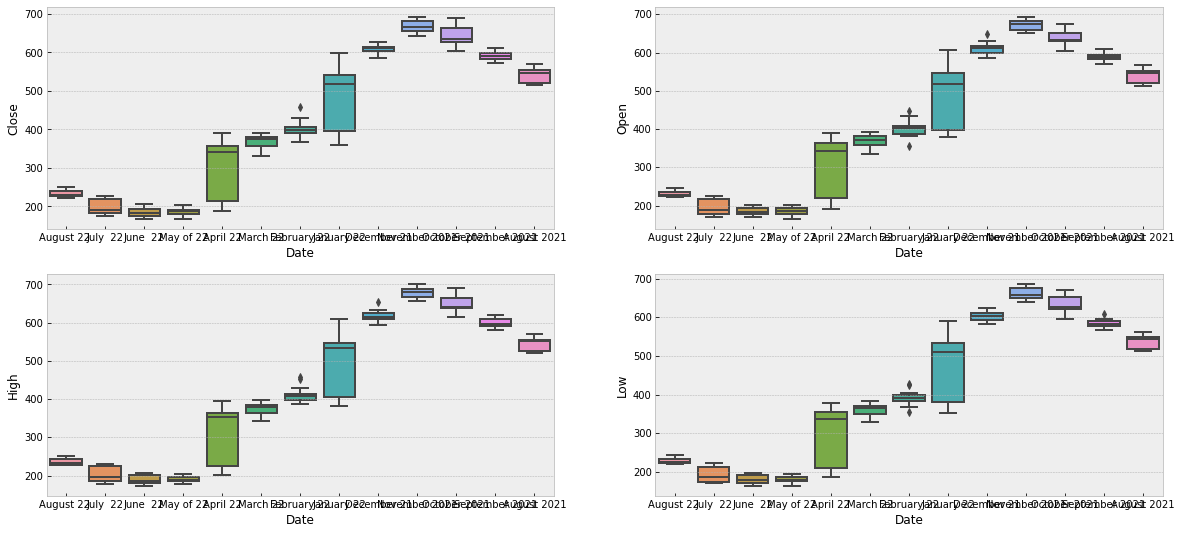

In [ ]:
df_months = pd.read_csv('NTFX_months.csv')
fig,axes=plt.subplots(2,2, figsize=(20,9)) # -> figsize es la relacion 16x9
sns.boxplot(y="Close", x="Date", data=df_months, orient="v", ax=axes[0,0])
sns.boxplot(y="Open", x="Date", data=df_months, orient="v", ax=axes[0,1])
sns.boxplot(y="High", x="Date", data=df_months, orient="v", ax=axes[1,0])
sns.boxplot(y="Low", x="Date", data=df_months, orient="v", ax=axes[1,1])
plt.show()

## Measures of central tendency

In [ ]:
df_months.groupby('Date').agg(['mean', 'median', pd.Series.mode])

High              \
                      mean      median   
Date                                     
April 22        306.073499  351.839996   
August 2021     546.836919  552.599976   
August 22       236.511000  232.135002   
December 21     616.962727  615.940002   
February 22     409.699474  408.000000   
January 22      498.946999  532.505005   
July  22        202.329002  194.940002   
June  22        189.522381  185.860001   
March 22        374.962608  379.760010   
May of 22       190.790476  188.869995   
November 2021   677.726188  679.479980   
October 2021    648.829043  640.390015   
September 2021  598.170003  595.650024   

                                                                   
                                                             mode  
Date                                                               
April 22                                                    352.0  
August 2021     [520.789978, 521.440002, 523.380005, 526.38000...  
August 22       [228.100006, 228.199997, 228.389999, 228.61999...  
December 21     [593.25, 602.289978, 602.830017, 602.880005, 6...  
February 22     [386.0, 390.730011, 391.290009, 392.420013, 39...  
January 22      [382.660004, 387.0, 387.26001, 387.709991, 394...  
July  22        [177.520004, 179.179993, 179.779999, 180.10000...  
June  22        [172.059998, 176.270004, 178.619995, 179.08999...  
March 22        [341.320007, 345.359985, 358.859985, 359.98999...  
May of 22       [177.580002, 180.919998, 181.869995, 183.19999...  
November 2021   [656.0, 660.330017, 660.5, 661.440002, 665.640...  
October 2021                                           639.419983  
September 2021  [581.880005, 584.619995, 587.280029, 587.47998...

In [ ]:
df_months

,Date,Open,High,Low,Close,Adj Close,Volume
0,August 22,244.809998,249.410004,243.759995,249.300003,249.300003,6089900
1,August 22,244.679993,251.619995,241.509995,242.699997,242.699997,8780100
2,August 22,236.990005,244.539993,236.600006,244.110001,244.110001,9254800
3,August 22,231.619995,232.199997,224.649994,229.940002,229.940002,6181200
4,August 22,227.490005,241.960007,226.410004,233.490005,233.490005,10982100
...,...,...,...,...,...,...,...
247,August 2021,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
248,August 2021,520.000000,526.380005,518.650024,521.869995,521.869995,2582000
249,August 2021,515.469971,520.789978,514.200012,518.909973,518.909973,2309800
250,August 2021,515.239990,523.380005,512.299988,517.919983,517.919983,2032800


### Autocorrelation


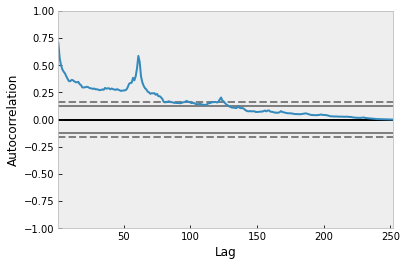

In [ ]:
series = pd.read_csv('NFLX.csv', header=0, index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

## Measures of dispersion

In [ ]:
#p: The number of lag observations included in the model, also called the lag order.
#d: The number of times that the raw observations are differenced, also called the degree of differencing.
#q: The size of the moving average window, also called the order of moving average.


series.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,421.939959,428.604722,414.485596,421.553491,421.553491,8.112127e+06
std,182.327371,183.173080,181.006540,181.831272,181.831272,1.101087e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,219.165001,226.010002,211.610000,218.437497,218.437497,3.267225e+06
50%,392.065002,400.334992,384.705001,391.660004,391.660004,5.382150e+06
75%,599.010010,609.557510,593.717484,599.827500,599.827500,8.989400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


### Variance


In [ ]:
series.var()

Open         3.324327e+04
High         3.355238e+04
Low          3.276337e+04
Close        3.306261e+04
Adj Close    3.306261e+04
Volume       1.212392e+14
dtype: float64

### Get the number of trading days

In [ ]:
df.shape # 252 elements of 7 values

(252, 7)

### Visualize the close price data

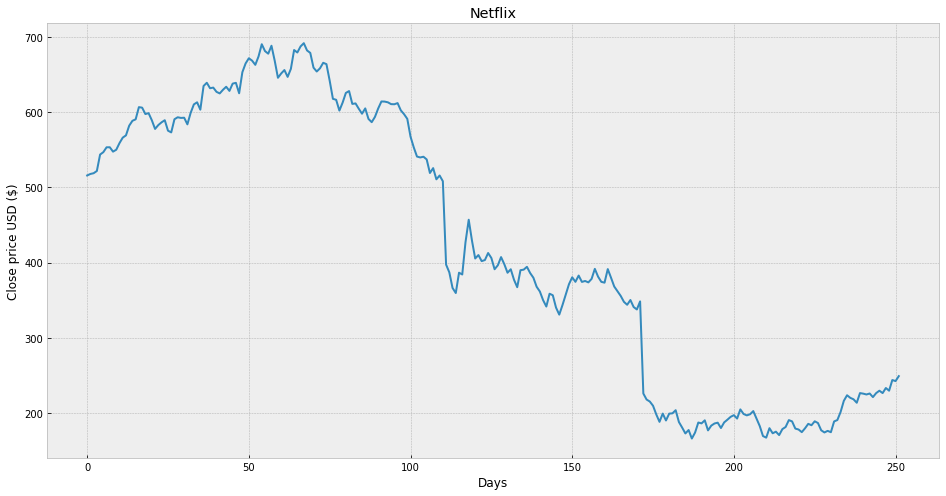

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.show()

### Get the close price

In [ ]:
df = df[['Close']]
df.head(4)

,Close
0,515.919983
1,517.919983
2,518.909973
3,521.869995


### Create a variable to predict the 'X' days out into the future 

In [ ]:
future_days = 70

# Create a new column (target) shifted 'x' days up

df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)


,Close,Prediction
248,229.940002,NaN
249,244.110001,NaN
250,242.699997,NaN
251,249.300003,NaN


In [ ]:
# Create the feature set (x) and convert it to a numpy array and rmeove the last 'x' days

X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[515.919983]
 [517.919983]
 [518.909973]
 [521.869995]
 [543.710022]
 [546.880005]
 [553.330017]
 [553.409973]
 [547.580017]
 [550.119995]
 [558.919983]
 [566.179993]
 [569.190002]
 [582.070007]
 [588.549988]
 [590.530029]
 [606.710022]
 [606.049988]
 [597.539978]
 [598.719971]
 [589.289978]
 [577.76001 ]
 [582.869995]
 [586.5     ]
 [589.349976]
 [575.429993]
 [573.140015]
 [590.650024]
 [593.26001 ]
 [592.390015]
 [592.640015]
 [583.849976]
 [599.059998]
 [610.340027]
 [613.150024]
 [603.349976]
 [634.809998]
 [639.099976]
 [631.849976]
 [632.659973]
 [627.039978]
 [624.940002]
 [629.76001 ]
 [633.799988]
 [628.289978]
 [637.969971]
 [639.      ]
 [625.140015]
 [653.159973]
 [664.780029]
 [671.659973]
 [668.52002 ]
 [662.919983]
 [674.049988]
 [690.309998]
 [681.169983]
 [677.719971]
 [688.289978]
 [668.400024]
 [645.719971]
 [651.450012]
 [655.98999 ]
 [646.909973]
 [657.580017]
 [682.609985]
 [679.330017]
 [687.400024]
 [691.690002]
 [682.02002 ]
 [678.799988]
 [659.200012]
 [654.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Create the target data set (y) and convert it to a numpy array and get all of the target calues except the last 'x' days

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y.size)

182


## Split the data into 75% training and 25% testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Create the decision tree regressor model

In [ ]:
# Build a decision tree regressor from the training set
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model

lr = LinearRegression().fit(x_train, y_train)

# Get the last x rows from the feature data set

x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


array([[387.149994],
       [366.420013],
       [359.700012],
       [386.700012],
       [384.359985],
       [427.140015],
       [457.130005],
       [429.480011],
       [405.600006],
       [410.170013],
       [402.100006],
       [403.529999],
       [412.890015],
       [406.269989],
       [391.309998],
       [396.570007],
       [407.459991],
       [398.079987],
       [386.670013],
       [391.290009],
       [377.380005],
       [367.459991],
       [390.029999],
       [390.799988],
       [394.519989],
       [386.23999 ],
       [380.029999],
       [368.070007],
       [361.730011],
       [350.26001 ],
       [341.76001 ],
       [358.790009],
       [356.769989],
       [340.320007],
       [331.01001 ],
       [343.75    ],
       [357.529999],
       [371.399994],
       [380.600006],
       [374.589996],
       [382.920013],
       [374.48999 ],
       [375.709991],
       [373.850006],
       [378.51001 ],
       [391.820007],
       [381.470001],
       [374.5

## Show the model tree prediction

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show with the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[204.009995  188.320007  180.970001  204.009995  179.949997  166.369995
 166.369995  166.369995  186.509995  190.559998  177.190002  183.479996
 186.350006  187.440002  180.339996  199.869995  191.399994  195.190002
 192.770004  180.339996  205.089996  169.690002  197.139999  198.610001
 177.339996  192.770004  182.940002  169.690002  167.539993  180.110001
 173.350006  180.970001  170.910004  178.889999  181.710007  218.509995
 189.139999  174.779999  178.360001  175.7149965 179.949997  175.7149965
 184.059998  189.270004  205.089996  177.339996  174.449997  175.7149965
 174.779999  189.110001  190.919998  201.630005  216.440002  223.880005
 224.899994  218.509995  213.910004  226.75      226.020004  224.899994
 226.210007  221.419998  226.729996  229.910004  226.779999  233.490005
 242.699997  244.110001  242.699997  249.300003 ]

[258.45891791 243.22730809 238.28970427 258.12828807 256.4089243
 287.84208023 309.87759614 289.56142122 272.01529232 275.37316146
 269.44362405 270.494329

## Visualize the data

### Decision tree regressor model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


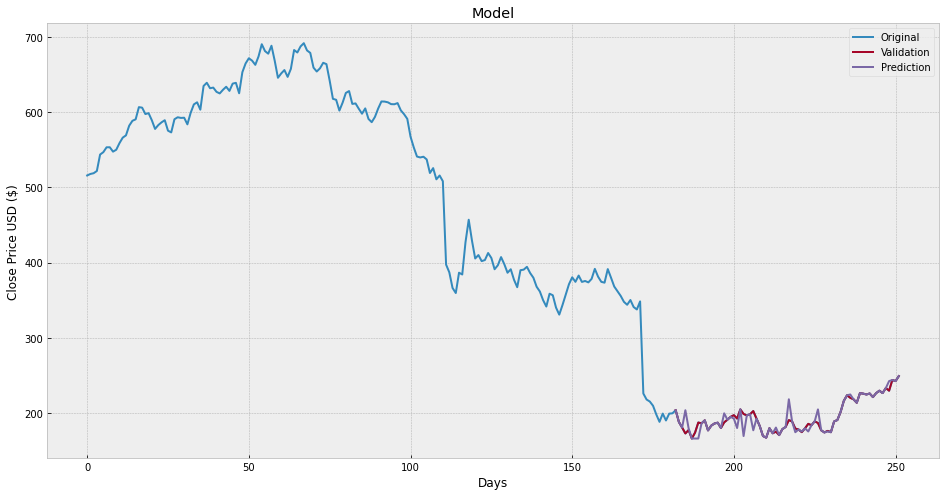

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Validation', 'Prediction'])

a_tr = valid[['Close']]
b_tr = valid[['Predictions']]

### Linear regressor model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


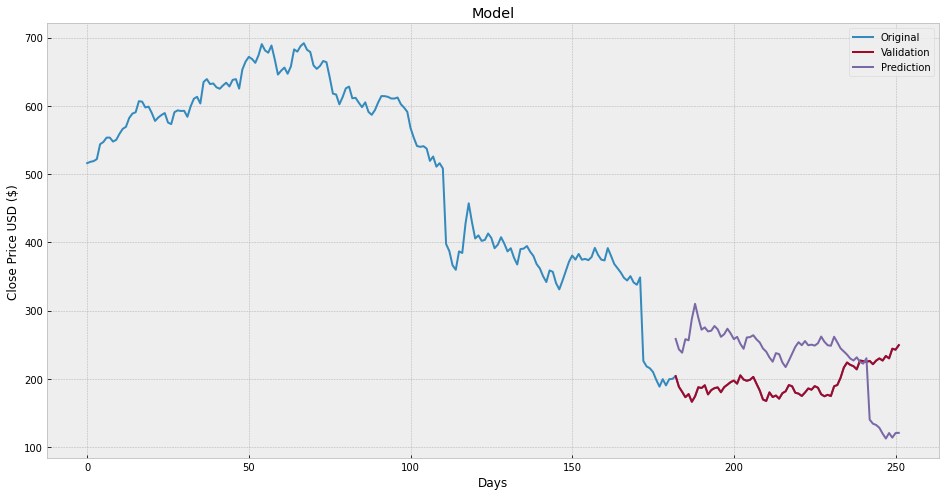

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Validation', 'Prediction'])

a_lr = valid[['Close']]
b_lr = valid[['Predictions']]

## Data validation

Similarity Measures with Euclidean distance and dynamic time warping (DTW)

The Euclidean distance can be used only when the two series have the same length, and a one-to-one correspondence exists between the data points. 

### Linear regressor model

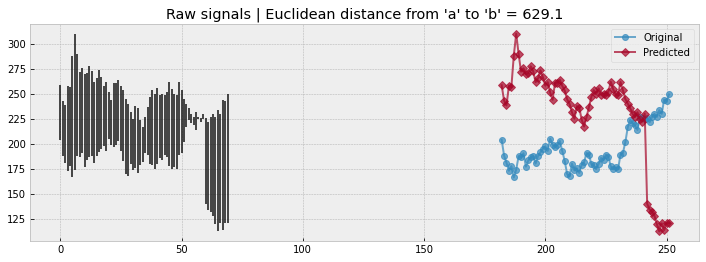

In [ ]:
euclid_distance_a_to_b = distance.euclidean(a_lr, b_lr)

fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.plot(a_lr, alpha=0.7, label="Original", marker="o")
axes.plot(b_lr, alpha=0.7, label="Predicted", marker="D")

# draw connecting segments between a_i and b_i used for Euclidean distance calculation
axes.vlines(np.arange(0, len(a_lr), 1), a_lr, b_lr, alpha = 0.7)
axes.legend()
axes.set_title("Raw signals | Euclidean distance from 'a' to 'b' = {:0.1f}".format(euclid_distance_a_to_b));

### Decision tree regressor model

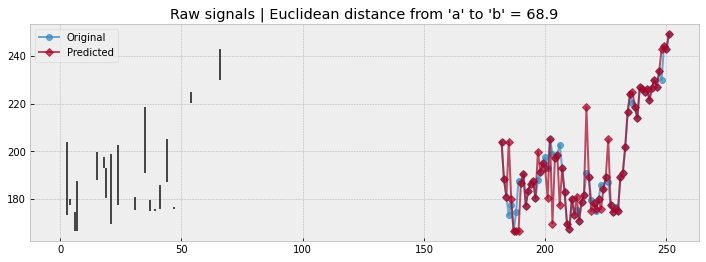

In [ ]:
euclid_distance_a_to_b = distance.euclidean(a_tr, b_tr)

fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.plot(a_tr, alpha=0.7, label="Original", marker="o")
axes.plot(b_tr, alpha=0.7, label="Predicted", marker="D")

# draw connecting segments between a_i and b_i used for Euclidean distance calculation
axes.vlines(np.arange(0, len(a_tr), 1), a_tr, b_tr, alpha = 0.7)
axes.legend()
axes.set_title("Raw signals | Euclidean distance from 'a' to 'b' = {:0.1f}".format(euclid_distance_a_to_b));